**Michael Vizelman**

## Using Pandas to Analyze Flight Data ## 

This projects goal is to  demonstrate the following:  
**(1)** make use of Python’s Pandas library   
**(2)** add, remove and transform data within a data frame  
**(3)** generate basic summary statistics and graphics as part of exploratory data analysis work   

The data set we’ll be using is a 20,000 row subset of the hflights package provided within the Rprogramming language and sourced originally from the US Bureau of Transportation Statistics:https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

The data set contains information and metrics for commercial domestic (USA) airline flights that departed from 2 separate airports located in Houston, TX (IAH and HOU) during the 2011 calendar year.  
A summary / description of the data set can be found here:https://cran.r-project.org/web/packages/hflights/hflights.pdf 

The flight attributes provided within the data set are as follows:  
**Year, Month, DayofMonth:** date of departure   
**DayOfWeek:** day of week of departure (useful for removing weekend effects)   
**DepTime:** departure time (in local time, hhmm)   
**ArrTime:** arrival time (in local time, hhmm)    
**UniqueCarrier:** unique abbreviation for a carrier   
**FlightNum:** flight number   
**TailNum:** airplane tail number   
**ActualElapsedTime:** elapsed time of flight, in minutes   
**AirTime:** flight time, in minutes   
**ArrDelay:** arrival delay, in minutes  
**DepDelay:** departure delay, in minutes   
**Origin:** origin airport code  
**Dest:** destination airport code  
**Distance:** distance of flight, in miles   
**TaxiIn:** taxi in time in minutes   
**TaxiOut:** taxi out time in minutes   
**Cancelled:** cancelled indicator: 1 = Yes, 0 = No   
**CancellationCode:** reason for cancellation: A = carrier, B = weather, C = national air system, D = security   
**Diverted: diverted indicator:** 1 = Yes, 0 = No   

After reviewing the data, we will define at three interesting research / analytical questions which we will seek to answer using the data. 

In [29]:
# import pandas and numpy packages 
import pandas as pd
import numpy as np

In [30]:
# read the data file from GitHub and convert to a DataFrame object named "flight"
filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
flight = pd.read_csv(filename)

### Look at the Data ###
At the initial stage of the project we looked at the columns we have in the DataFrame.

In [31]:
# display the column index for the data frame
flight.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

### Date Variable ###
The Date of each flight was separated into 3 columns. In order to make it easier to use we created a new column with the full date for each flight. 

In [32]:
# use describe() to check type of 'Year' variable
flight['Year'].describe()

count    20000.0
mean      2011.0
std          0.0
min       2011.0
25%       2011.0
50%       2011.0
75%       2011.0
max       2011.0
Name: Year, dtype: float64

In [33]:
# create variable 'Date' by changing variables from float to string and concatenating 
flight['Date'] = flight['Month'].map(str)+'/'+flight['DayofMonth'].map(str)+'/'+flight['Year'].map(str)
# check 'Date' type changed
flight['Date'].describe()

count        20000
unique          59
top       1/3/2011
freq           702
Name: Date, dtype: object

### Variable Exploration ###

To help us analyzes the data, we generate descriptive statistics about the data in all the columns. Since there are too many columns, we had to separate the statistics into two different tables.

In [34]:
# use describe() to generate statistics for columns (0 to 11).
flight.iloc[:,:12].describe(include = 'all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay
count,20000.0,20000.000000,20000.000000,20000.000000,19785.000000,19766.000000,20000,20000.000000,19892,19738.000000,19738.000000,19738.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,2030,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,CO,NaN,N14939,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,6830,NaN,86,NaN,NaN,NaN
mean,2011.0,1.054500,16.319000,4.020300,1396.328228,1586.669382,NaN,1626.416900,NaN,126.795319,105.584355,5.205340
std,0.0,0.227007,9.025692,2.096904,441.598739,458.489922,NaN,1142.067143,NaN,60.158125,57.655970,25.383494
min,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,35.000000,23.000000,-49.000000
25%,2011.0,1.000000,8.000000,2.000000,1026.000000,1224.250000,NaN,582.000000,NaN,74.000000,54.000000,-8.000000
50%,2011.0,1.000000,17.000000,4.000000,1416.000000,1620.000000,NaN,1644.000000,NaN,123.000000,102.000000,0.000000
75%,2011.0,1.000000,25.000000,6.000000,1801.000000,1955.000000,NaN,2536.000000,NaN,162.000000,138.000000,11.000000


In [35]:
# use describe() to generate statistics for columns (12 to 21)
flight.iloc[:,12:].describe(include = 'all')

,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Date
count,19785.000000,20000,20000,20000.000000,19766.000000,19780.000000,20000.000000,224,20000.000000,20000
unique,NaN,2,106,NaN,NaN,NaN,NaN,3,NaN,59
top,NaN,IAH,DAL,NaN,NaN,NaN,NaN,B,NaN,1/3/2011
freq,NaN,15681,884,NaN,NaN,NaN,NaN,162,NaN,702
mean,8.297700,NaN,NaN,772.899550,6.076546,15.134328,0.011200,NaN,0.001900,NaN
std,23.934218,NaN,NaN,458.640531,4.085732,7.046056,0.105238,NaN,0.043549,NaN
min,-18.000000,NaN,NaN,127.000000,1.000000,4.000000,0.000000,NaN,0.000000,NaN
25%,-3.000000,NaN,NaN,351.000000,4.000000,10.000000,0.000000,NaN,0.000000,NaN
50%,1.000000,NaN,NaN,787.000000,5.000000,14.000000,0.000000,NaN,0.000000,NaN
75%,10.000000,NaN,NaN,1034.000000,7.000000,18.000000,0.000000,NaN,0.000000,NaN


It is clear from the statistics that some of the variables are wrongly interpreted - for example, FlighNum, DepTime, and ArrTime. We chose to change the format of these variables.

In [36]:
# change variable 'FlightNum' to a string
flight['FlightNum']=flight['FlightNum'].map(str)

In [37]:
# check'FlightNum' type changed
flight['FlightNum'].describe()

count     20000
unique     1246
top        1590
freq         62
Name: FlightNum, dtype: object

We tried changing the format of variables 'DepTime' and 'ArrTime' to a Datetime format but had difficulties with the NaN values.

#### Diverted Variable ####
We decided to explore the diverted flights to see if there were any insights to be drawn from it. 

We looked at the number of flights diverted by the destination of the flight. 

We decided there was not much to draw out of this information.  The vast majority of flights in the data set reached their destination. 

In [38]:
# subset fligt df with only 'Dest' and 'Diverted' columns
# to check how many flight were diverted and to which destinations
sub=flight.loc[:,['Dest','Diverted']].copy()
sub['Dest'].describe() # the outcome is 106 unique destinations  

#We selected only the diverted flights (Diverted==1)
sub=sub[sub['Diverted']==1]
sub['Dest'].describe() # the outcome is 38 Diverted fligths to 32 destinations

count      38
unique     32
top       MKE
freq        2
Name: Dest, dtype: object

### First question ###
From a consumers point of view we imagine that before booking a flight ticket on an airline it would be valuable to know about the flight cancellation history of the airline, and in particular, the cancellation history due to the carrier and not due to reasons beyond the carrier's control. 

**Our question would be:** 

What was the number of flights canceled due to carrier reasons for each carrier? (during the period of time  available in the data)

**Our approach:**

We created a subset of the DataFrame including only the rows where the value under 'CancellationCode' was 'A' meaning due to carrier reasons (CancellationCode values are representing the reason for cancellation: A = carrier, B = weather, C = national air system, D = security).
In this subset, we looked at only two columns ('UniqueCarrier' ,'Cancelled'), representing the carrier name and the cancellation of the flight.
We grouped the rows by the carrier to calculate the total amount of flights canceled by each of them.

In [39]:
# subset flight df with only the flights canceled by carrier
# and subset again with only the carrier column and cancelation column to allow counting of flights.
#we could have used any other column to count the flights but this was the most meaninful.
sub1=flight[flight['CancellationCode']=='A'].loc[:,['UniqueCarrier','Cancelled']].copy()

# create a subset to answer our question - canceled flights by carrier. 
# We used the function group by in pandas that allows doing some basic math on a df,
# grouping by one or more variables.
ex1=sub1.groupby(['UniqueCarrier']).sum()

# rename the column to a more meaningful name
ex1.columns=['Num_Fligths_Cancelled_By_Carrier']

ex1

,Num_Fligths_Cancelled_By_Carrier
UniqueCarrier,
AA,2
B6,1
CO,5
DL,2
EV,6
FL,1
MQ,1
UA,1
US,2


In [40]:
# To have a clearer view of the company with the most cancelled flights, 
# we sort the number of canceled flights in descending order using the sort_values pandas function
ex1=ex1.sort_values('Num_Fligths_Cancelled_By_Carrier',ascending = False)
ex1

,Num_Fligths_Cancelled_By_Carrier
UniqueCarrier,
WN,23
XE,13
EV,6
CO,5
AA,2
DL,2
US,2
B6,1
FL,1


### Answer for the First question ###

The bar plot below provides the carrier codes which had flights canceled due to carrier reasons sorted by amount of such flights from high to low. 

If this is a crucial concern, we would avoid WN airlines (SOUTHWEST Airlines) and XE airline. 

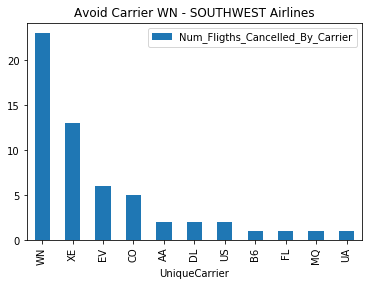

In [41]:
# create a bar plot of number of canceld flights by carrier
ex1.plot.bar(title ='Avoid Carrier WN - SOUTHWEST Airlines');

### Second question ###
From a consumers point of view, we imagine that before booking a flight ticket it would be valuable to know about the departure delay history (on average by day), at the airport one is planning to depart from. 
If we do not need to fly out on a specific day, since usually while planing a vacation people have a +/- few days flexibility this information would be useful to try avoiding delays. 

From an airport management point of view, this information would be useful to analyze the reasons for departure delays for future planing (not enough staffing or too many flights or other reasons such as weather constraints at the departure or arrival destinations during a specific period).

**Our question would be:** 

What was the average departure delay of flights for each calendar day? (during the period of time available in the data)

**Our approach:**

We created a box plot of the 'DepDelay' variable to describe the summary statistics for the departure delay from each airport. Then, we created a line plot of the average departure delay for each calendar day from each airport. 

Answer to question 2 for William P. Hobby Airport (HOU) 


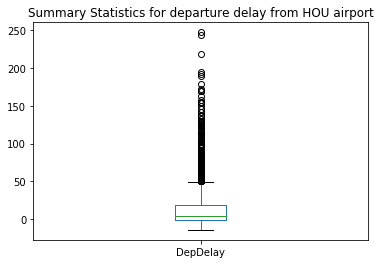

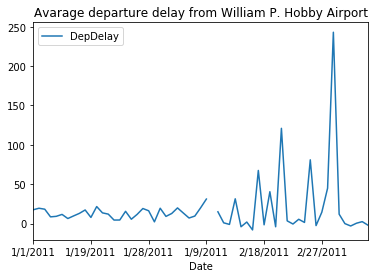

In [42]:
print('Answer to question 2 for William P. Hobby Airport ''(HOU)'' ')

# subset flight df with only the 'Date', 'Origin', and 'DepDelay' columns
sub2=flight.loc[:,['Date','Origin','DepDelay']]

# and subset again with only the flights departing 'HOU' airport
sub2BoxHOU=sub2[sub2['Origin']=='HOU']
# create box plot to generally analyze by departure from 'HOU' airport
sub2BoxHOU['DepDelay'].plot(kind = 'box', title='Summary Statistics for departure delay from HOU airport');

# subset again while grouping flights by date and airport and calculating average departure delay
ex2=sub2.groupby(['Date','Origin'],as_index=False).mean()

# subset again only for flights departing from 'HOU' airport 
ex3=ex2[ex2['Origin']=='HOU']
# create line plot to analyze by average departure delay from 'HOU' airport
ex3.plot.line(x='Date',y='DepDelay',title ='Avarage departure delay from William P. Hobby Airport');

Answer to question 2 for William P. Hobby Airport (IAH) 


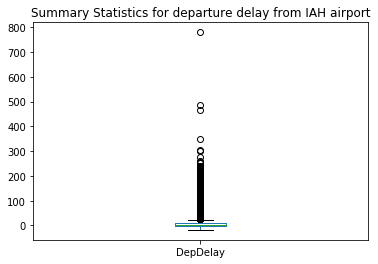

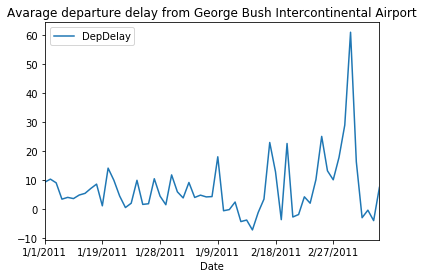

In [43]:
print('Answer to question 2 for William P. Hobby Airport ''(IAH)'' ')

# subset again with only the flights departing 'IAH' airport
sub2BoxIAH=sub2[sub2['Origin']=='IAH']
# create box plot to generally analyze by departure from 'IAH' airport
sub2BoxIAH['DepDelay'].plot(kind = 'box', title='Summary Statistics for departure delay from IAH airport');

# subset again only for flights departing from 'IAH' airport 
ex3_1=ex2[ex2['Origin']=='IAH']
# create line plot to analyze by average departure delay from 'HOU' airport
ex3_1.plot.line(x='Date',y='DepDelay',title ='Avarage departure delay from George Bush Intercontinental Airport');

### Answer for the Second question ###


The box plots and line plots above provide the Summary Statistics for departure delay and Average departure delay per day from OHU (William P. Hobby) and IAH (George Bush Intercontinental) airports.

The data provided is only for January and February 2011. According to google, May-Aug is peak Air-travel time from Houston, Texas, and Nov-Feb is mild. From the plots we can conclude that the longer delays at the end of February were most likely due to bad weather conditions, since there is a peak at both airports even though this period usually has mild Air-travel.

For airline management, these plots would provide an assisting tool for future planning of flight schedules. It would be especially beneficial for HOU airport to use this data for future planning since it was more significantly impacted (in average values) than IAH airport. 

### Third  question ### 
From a consumers point of view, we imagine that before booking a flight ticket with a specific airline it would be valuable to know about the arrival delay history of flights for the airline, especially when planing a multi-leg trip with a connection before the final destination.

From an airline management point of view, this information would be useful to analyze the reasons for arrival delays for future planing.

**Our question would be:** 

What was the number of flights that arrived late for each carrier? (during the period of time available in the data)

**Our approach:**

The Bureau of Transportation Statistics (BTS) defines a late flight as "A flight arriving or departing 15 minutes or more after the scheduled time." Going from this definition we created new columns showing the amount of flights that arrived on-time or early, with a short delay (15min to an hour late), mild delay (hour to 2 hours), and long delay (2hours or more) by airline (during the period of time available in the data).

To be able to show a table containing all the information above, our approach was to use the groupby function and subset the data by the different categories.
Every subset has the same index ('Carrier'), which allows us to join the different results of the subsets to create the wanted table.

In [44]:
# subset fligt df with only 'UniqueCarrier' and 'ArrDelay' columns
# to check how many flight were late on arrival
sub4=flight.loc[:,['UniqueCarrier','ArrDelay']]
# use describe() to generate general statistics for 'ArrDelay' variable
sub4['ArrDelay'].describe()

count    19738.000000
mean         5.205340
std         25.383494
min        -49.000000
25%         -8.000000
50%          0.000000
75%         11.000000
max        775.000000
Name: ArrDelay, dtype: float64

In [45]:
# subset while grouping ALL flights by UniqueCarrier
ex4=sub4.groupby(['UniqueCarrier'],as_index=False).count()
# create column 'Total fligths' for all flights by carrier
ex4.columns=['Carrier','Total fligths']

# subset using the previously defined condition while grouping flights on-time or early by UniqueCarrier 
ex5=sub4[sub4['ArrDelay']<15].groupby(['UniqueCarrier'],as_index=False).count()
# create column 'On time or Early' for all flights by carrier
ex5.columns=['Carrier','On time or Early']

# subset using the previously defined condition while grouping flights with short delay by UniqueCarrier
ex6=sub4[(sub4['ArrDelay']>=15) & (sub4['ArrDelay']<60)].groupby(['UniqueCarrier'],as_index=False).count()
# create column for flights with 'Short delay 15min to 1 hour' by carrier
ex6.columns=['Carrier','Short delay 15min to 1 hour']

# subset using the previously defined condition while grouping flights with mild delay by UniqueCarrier
ex7=sub4[(sub4['ArrDelay']>=60) & (sub4['ArrDelay']<120)].groupby(['UniqueCarrier'],as_index=False).count()
# create column for flights with 'Mild delay 1 hour to 2 hours' by carrier
ex7.columns=['Carrier','Mild delay 1 hour to 2 hours']

# subset using the previously defined condition while grouping flights with long delay by UniqueCarrier             
ex8=sub4[(sub4['ArrDelay']>=120)].groupby(['UniqueCarrier'],as_index=False).count()
# create column for flights with 'Long delay 2 hours or more' by carrier
ex8.columns=['Carrier','Long delay 2 hours or more']

# create final joining all columns
final=ex4.set_index('Carrier').join((ex5.set_index('Carrier'),ex6.set_index('Carrier'),ex7.set_index('Carrier'), ex8.set_index('Carrier')))

# add column representing percentage of total flights delayed regardless of delay length. 
# The percentage is calculated as: the difference between (Total flights) and (On time or early flights), 
# divided by the Total number of fligths.
final['Percentage of total delayed flights']=round((final['Total fligths']-final['On time or Early'])/final['Total fligths'],2)
# printing final subset
final

,Total fligths,On time or Early,Short delay 15min to 1 hour,Mild delay 1 hour to 2 hours,Long delay 2 hours or more,Percentage of total delayed flights
Carrier,,,,,,
AA,504,427,59,15.0,3.0,0.15
AS,58,40,16,1.0,1.0,0.31
B6,93,72,9,7.0,5.0,0.23
CO,6767,5369,1183,158.0,57.0,0.21
DL,238,199,29,5.0,5.0,0.16
EV,96,76,12,2.0,6.0,0.21
F9,62,40,21,1.0,NaN,0.35
FL,133,111,19,3.0,NaN,0.17
MQ,325,253,53,12.0,7.0,0.22


In [46]:
# sort in descending order by Percentage of total delayed flights
# for easier insights extraction
final.sort_values('Percentage of total delayed flights',ascending = False)

,Total fligths,On time or Early,Short delay 15min to 1 hour,Mild delay 1 hour to 2 hours,Long delay 2 hours or more,Percentage of total delayed flights
Carrier,,,,,,
F9,62,40,21,1.0,NaN,0.35
AS,58,40,16,1.0,1.0,0.31
WN,3667,2683,834,121.0,29.0,0.27
B6,93,72,9,7.0,5.0,0.23
MQ,325,253,53,12.0,7.0,0.22
CO,6767,5369,1183,158.0,57.0,0.21
EV,96,76,12,2.0,6.0,0.21
OO,689,541,124,20.0,4.0,0.21
FL,133,111,19,3.0,NaN,0.17


### Answer for the Third question ###

The table above can help decide which airline a customer would pick while looking for a flight ticket.
Airline 'F9' is small with only 62 flights from which 35% were late, but mostly had short delays.
Airline 'CO' is big with 6767 flights from which 21% were late, 17.5% had a short delay and 3.5% had a mild or long delay.
Ultimately this would be a decision based on personal risk preference. 

For airline management, this table would provide an assisting tool for future planning of flight schedules.